<a href="https://colab.research.google.com/github/kevingray92/ATMS-597-Project-5/blob/BSSedits/Logistic_Regression_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from datetime import datetime

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
### Read all years data file
#filename = '/content/drive/My Drive/decoded_metar_FINAL.csv'
filename = 'drive/My Drive/Colab Notebooks/ATMS-597/Project05/decoded_metar_FINAL.csv' #Kevin filepath
decoded_metar_master = pd.read_csv(filename,dtype={'current_wx1':str})

In [0]:
decoded_metar_master

,Unnamed: 0,date_time,station_id,latitude,longitude,elevation,date_time.1,wind_direction,wind_speed,current_wx1,air_temperature,dew_point_temperature,altimeter,present_weather,past_weather,past_weather2,eastward_wind,northward_wind,month,fzn_or_liq
0,1,2000-01-01 00:55:00,KMSN,43.13,-89.35,261,2000-01-01 00:55:00,320.0,6.0,-SN,-6.0,-9.0,29.92,71,0,0,3.856726,-4.596267,1,1
1,2,2000-01-01 01:00:00,KMSN,43.13,-89.35,261,2000-01-01 01:00:00,340.0,7.0,-SN,-5.0,-9.0,29.92,71,0,0,2.394141,-6.577848,1,1
2,3,2000-01-01 01:05:00,KMSN,43.13,-89.35,261,2000-01-01 01:05:00,330.0,10.0,-SN,-5.0,-10.0,29.92,71,0,0,5.000000,-8.660254,1,1
3,4,2000-01-01 01:10:00,KMSN,43.13,-89.35,261,2000-01-01 01:10:00,320.0,8.0,-SN,-6.0,-10.0,29.93,71,0,0,5.142301,-6.128356,1,1
4,5,2000-01-01 01:15:00,KMSN,43.13,-89.35,261,2000-01-01 01:15:00,320.0,8.0,-SN,-6.0,-10.0,29.93,71,0,0,5.142301,-6.128356,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175199,412969,2019-12-31 15:25:00,KMSN,43.13,-89.35,261,2019-12-31 15:25:00,300.0,8.0,-SN,-4.0,-8.0,29.69,71,0,0,6.928203,-4.000000,12,1
175200,412970,2019-12-31 15:30:00,KMSN,43.13,-89.35,261,2019-12-31 15:30:00,300.0,9.0,-SN,-4.0,-8.0,29.69,71,0,0,7.794229,-4.500000,12,1
175201,412971,2019-12-31 15:35:00,KMSN,43.13,-89.35,261,2019-12-31 15:35:00,300.0,8.0,-SN,-4.0,-8.0,29.69,71,0,0,6.928203,-4.000000,12,1
175202,412972,2019-12-31 15:40:00,KMSN,43.13,-89.35,261,2019-12-31 15:40:00,290.0,10.0,-SN,-4.0,-8.0,29.69,71,0,0,9.396926,-3.420201,12,1


In [0]:
### Split data 70/30 between training/testing
from sklearn.model_selection import train_test_split
#predictor_cols = ['air_temperature']
predictor_cols = ['air_temperature', 'wind_direction', 'wind_speed', 'dew_point_temperature', 'eastward_wind', 'northward_wind', 'month']
target_cols = ['fzn_or_liq']
X = decoded_metar_master[predictor_cols]
Y = decoded_metar_master[target_cols]
training_predictor, test_predictor, training_target, test_target = train_test_split(X, Y, test_size=0.3)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# Initiate the model using the default parameters
logreg = LogisticRegression()

# Fit the model
#logreg.fit(training_predictor_array.reshape(-1,1), training_target['fzn_or_liq'])
logreg.fit(training_predictor, training_target['fzn_or_liq'])

# Predictions
ptype_predict=logreg.predict(test_predictor)
predsprob = logreg.predict_proba(test_predictor)

In [0]:
#print(len(predsprob))
prob0 = []
prob1 = []
for i in range(len(predsprob)):
    prob0.append(predsprob[i][0])
    prob1.append(predsprob[i][1])

In [0]:
# Check skill with confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_target['fzn_or_liq'], ptype_predict)
cnf_matrix

array([[26977,   658],
       [  461, 24466]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 257.44, 'Predicted label')

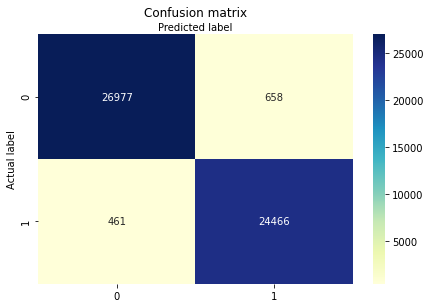

In [0]:
# Plot confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
# Other performance metrics

#Jaccard Index, want this to be close to one
from sklearn.metrics import jaccard_score
j_index = jaccard_score(y_true=test_target['fzn_or_liq'],y_pred=ptype_predict)
round(j_index,2)
print('j_index:',j_index)

# F1-score
from sklearn.metrics import f1_score
f1 = f1_score(test_target['fzn_or_liq'], ptype_predict)
print('f1 score',f1)

# Brier skill score
##from sklearn.metrics import brier_score_loss
##log_score = brier_score_loss((test_target['fzn_or_liq'].values).reshape(-1,1), predsprob[:][0])
##print('Brier:',log_score)
from sklearn.metrics import brier_score_loss
brier_score = brier_score_loss(test_target['fzn_or_liq'],prob1)
print('Brier:',brier_score)

# Precision score
from sklearn.metrics import precision_score
precision_score = precision_score(test_target['fzn_or_liq'], ptype_predict)
print('precision score:', precision_score)

j_index: 0.9562634356068008
f1 score 0.9776428043395736
Brier: 0.015002318039767822
precision score: 0.9738099028817068


In [0]:
### Get the climatology of fzn_or_liq
a = decoded_metar_master['fzn_or_liq']
counts = a.value_counts()
totalcounts = counts[0]+counts[1]
prcntliq = counts[0]/totalcounts
prcntfzn = counts[1]/totalcounts
print('Percent liquid reports:',prcntliq)
print('Percent frozen reports:',prcntfzn)

Percent liquid reports: 0.528914864957421
Percent frozen reports: 0.47108513504257893


In [0]:
### Now make a new artificial probability lists filled with climatology values
#print(len(predsprob))
probCLIMO0 = []
probCLIMO1 = []
for i in range(len(predsprob)):
    probCLIMO0.append(prcntliq)
    probCLIMO1.append(prcntfzn)


### Get Brier score for this reference prediction
# Brier skill score
##from sklearn.metrics import brier_score_loss
##log_score = brier_score_loss((test_target['fzn_or_liq'].values).reshape(-1,1), predsprob[:][0])
##print('Brier:',log_score)
from sklearn.metrics import brier_score_loss
brier_score_reference = brier_score_loss(test_target['fzn_or_liq'],probCLIMO1)
print('Reference Brier:',brier_score)

Reference Brier: 0.015002318039767822


In [0]:
### Calculate Brier Skill Score = (BSref-BSmodel)/BSref
brier_skill_score = (brier_score_reference-brier_score)/brier_score_reference
print('Brier Skill Score:',brier_skill_score)

Brier Skill Score: 0.9398334216972509
